# Hungary road network centrality analysis

In [ ]:
!!pip install osmnx

In [ ]:
import osmnx as ox
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
import seaborn as sns
from IPython.display import IFrame


###Making the data

Getting primary road segments from OpenStreetMap!

In [ ]:
custom_filter = '["highway"~"primary"]'
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Hungary', network_type=None, custom_filter=custom_filter)

The query results.\
A problem in new version of matplotlib does not let us to plot please run this when running code in colab

In [ ]:
!python -m pip uninstall matplotlib
!!pip install matplotlib==3.1.3

Let's focus on the downtown, otherwise, the area is still to big for this hands-on session.

In [ ]:
nodes, edges = ox.graph_to_gdfs(G)

Count streets (undirected edges) incident on each node.

In [ ]:
stats = ox.basic_stats(G)
stats_df=pd.DataFrame(index=stats.keys(), data=stats.values())
stats_df

,0
n,5322
m,9199
k_avg,3.456971
edge_length_total,14387933.604
edge_length_avg,1564.075835
streets_per_node_avg,2.877114
streets_per_node_counts,"{0: 0, 1: 268, 2: 352, 3: 4491, 4: 195, 5: 9, ..."
streets_per_node_proportions,"{0: 0.0, 1: 0.05035700864336715, 2: 0.06614054..."
intersection_count,5054
street_length_total,7701270.05


In [ ]:
Count_street=stats_df.loc['streets_per_node_counts'].values[0]
Count_street_df=pd.DataFrame(index=Count_street.keys(), data=Count_street.values())
Count_street_df.reset_index(inplace=True)
Count_street_df.rename(columns={0:'count','index':'street_count'}, inplace=True)
Count_street_df

,street_count,count
0,0,0
1,1,268
2,2,352
3,3,4491
4,4,195
5,5,9
6,6,7


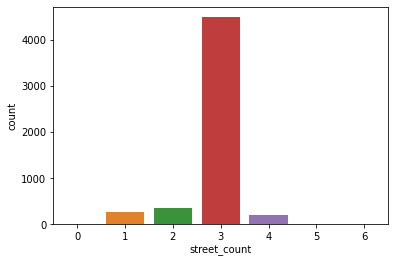

In [ ]:
sns.barplot(x="street_count", y="count", data=Count_street_df)

In [ ]:
ox.io.save_graphml(G, filepath='Hungray_freeways.graphml', gephi=False, encoding='utf-8')

###IO from data in link(Run this with file in the page

In [ ]:
G=ox.io.load_graphml(filepath='Hungray_freeways.graphml')

###Run this for plots

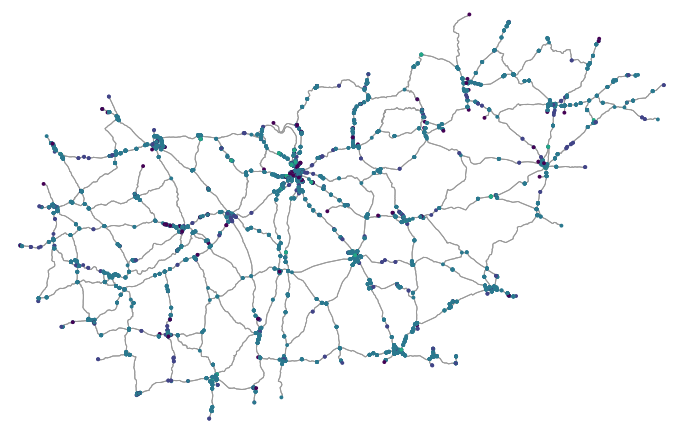

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f585d93e0d0>)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ox.plot_graph(G,node_color=nodes.street_count,ax=ax)

In [ ]:
ox.plot_graph_folium(G, weight=2, color="#8b0000")

run this to save

In [ ]:
m1=ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")
# save as html file then display map as an iframe
filepath = "graph.html"
m1.save(filepath)

###If you don't want to eliminate nodes with degee 2 and their paths donot run this cells.

creat new nodes gdf which has street count of non2

In [ ]:
nodes_to_remove=(nodes[nodes['street_count']==2]).index.values
new_nodes = nodes[~nodes.index.isin(nodes_to_remove)]

creat new edges gdf which has street count of non2

In [ ]:
New_edges=edges[(~edges.index.get_level_values(0).isin(nodes_to_remove))]

In [ ]:
New_G=ox.utils_graph.graph_from_gdfs(new_nodes,New_edges)

<Figure size 1080x1080 with 0 Axes>

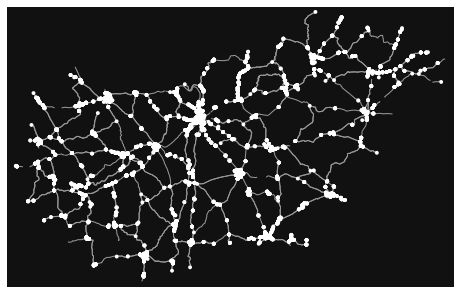

In [ ]:
plt.figure(figsize=(15,15))
ox.plot_graph(New_G)
plt.show()